In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Dataset

In [24]:
import urllib.request
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
filename = 'data/data.csv'
urllib.request.urlretrieve(url, filename)

('data/data.csv', <http.client.HTTPMessage at 0x25830524140>)

# Preparing the dataset

In [25]:
df = pd.read_csv(filename)
df

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01
...,...,...,...,...,...,...,...,...,...,...,...,...
2155,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3060,17.3,No,2699.99
2156,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,16,1000,SSD,RTX 3070,17.3,No,2899.99
2157,Razer Blade 17 FHD 360Hz Intel Core i7-11800H/...,Refurbished,Razer,Blade,Intel Core i7,32,1000,SSD,RTX 3080,17.3,No,3399.99
2158,Razer Book 13 Intel Evo Core i7-1165G7/16GB/1T...,Refurbished,Razer,Book,Intel Evo Core i7,16,1000,SSD,NaN,13.4,Yes,1899.99


In [26]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


Next, use only the following columns:

* `'ram'`,
* `'storage'`,
* `'screen'`,
* `'final_price'`

In [27]:
df_numeric = df.select_dtypes(include=['number'])
df_numeric

,ram,storage,screen,final_price
0,8,512,15.6,1009.00
1,8,256,15.6,299.00
2,8,256,15.6,789.00
3,16,1000,15.6,1199.00
4,16,512,15.6,669.01
...,...,...,...,...
2155,16,1000,17.3,2699.99
2156,16,1000,17.3,2899.99
2157,32,1000,17.3,3399.99
2158,16,1000,13.4,1899.99


# EDA

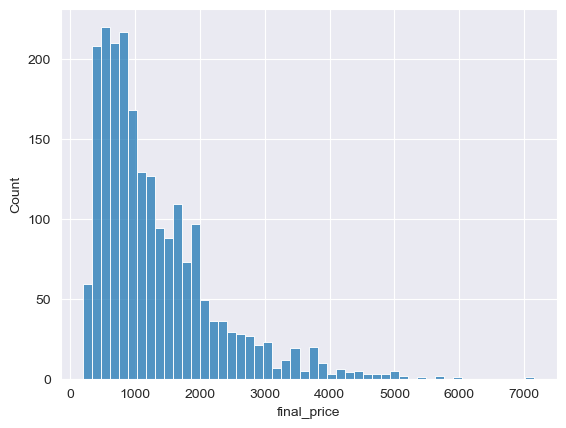

In [28]:
sns.histplot(df_numeric.final_price, bins=50)
plt.show()

### Question 1

There's one column with missing values. What is it?

* `'ram'`
* `'storage'`
* `'screen'`
* `'final_price'`

In [29]:
df_numeric.columns[df_numeric.isnull().any()].tolist()

['screen']

### Question 2

What's the median (50% percentile) for variable `'ram'`?

- 8
- 16
- 24
- 32

In [30]:
df_numeric['ram'].median()

16.0

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


In [31]:
n = len(df_numeric)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
n_val, n_test, n_train

(432, 432, 1296)

In [32]:
def train_val_test_split(s):
    idx = np.arange(n)
    np.random.seed(s)
    np.random.shuffle(idx)
    
    df_train = df_numeric.iloc[idx[:n_train]]
    df_val = df_numeric.iloc[idx[n_train:n_train + n_val]]
    df_test = df_numeric.iloc[idx[n_train + n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)
    
    y_train = (df_train.final_price.values)
    y_val = (df_val.final_price.values)
    y_test = (df_test.final_price.values)
    
    del df_train['final_price']
    del df_val['final_price']
    del df_test['final_price']
    
    return df_train, df_val, df_test, y_train, y_val, y_test

In [33]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(42)
len(y_train), len(y_val), len(y_test)

(1296, 432, 432)

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good

In [34]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    error = y - y_pred
    return np.sqrt(np.mean(error ** 2))

def prepare_X(df, na_val):
    df = df.copy()
    X = df.fillna(na_val).values
    return X

def predict(df_train, y_train, df_test, na_val):
    X_train = prepare_X(df_train, na_val)
    w0, w = train_linear_regression(X_train, y_train)
    
    X_test = prepare_X(df_test, na_val)
    y_pred = w0 + X_test.dot(w)
    return y_pred

In [35]:
# Using zero
y_pred_val = predict(df_train, y_train, df_val, 0)
score_zero = round(rmse(y_val, y_pred_val), 2)
print("score_zero: ", score_zero)

# Using mean
mean = df_train.mean()
y_pred_val = predict(df_train, y_train, df_val, mean)
score_mean = round(rmse(y_val, y_pred_val), 2)
print("score_mean: ", score_mean)

score_zero:  597.36
score_mean:  600.27


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100

In [36]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

def predict_reg(df_train, y_train, df_test, na_val, r):
    X_train = prepare_X(df_train, na_val)
    w0, w = train_linear_regression_reg(X_train, y_train, r)
    
    X_test = prepare_X(df_test, na_val)
    y_pred = w0 + X_test.dot(w)
    return y_pred

In [37]:
for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    y_pred_val = predict_reg(df_train, y_train, df_val, 0, r = r)
    score = round(rmse(y_val, y_pred_val), 2)
    print("r: ", r, "score: ", score)

r:  0 score:  597.36
r:  0.01 score:  597.36
r:  0.1 score:  597.35
r:  1 score:  597.21
r:  5 score:  597.01
r:  10 score:  597.06
r:  100 score:  597.9


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 19.176
- 29.176
- 39.176
- 49.176

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

In [38]:
scores = []
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(s)
    
    y_pred_val = predict(df_train, y_train, df_val, 0)
    score = rmse(y_val, y_pred_val)
    scores.append(score)
print(round(np.std(scores), 3))

29.176


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:

- 598.60
- 608.60
- 618.60
- 628.60

In [39]:
df_train, df_val, df_test, y_train, y_val, y_test = train_val_test_split(9)

In [40]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

In [41]:
y_pred_test = predict_reg(df_full_train, y_full_train, df_test, 0, 0.001)
score = rmse(y_test, y_pred_test)
score

608.6099822049559